# Validación de python
### Realizado por: Germán Camilo Leguízamo Guzmán
### Fecha: 11 de agosto de 2025

## Descripción
Este proyecto explora un dataset extraído de la base de datos ofertas_relampago.csv, que contiene información sobre productos, precios, fechas y condiciones de ofertas especiales. El objetivo principal es comprender la composición y comportamiento de las ofertas, así como detectar patrones y tendencias que puedan aportar valor en un contexto comercial. Este análisis se desarrolla con Python, aplicando técnicas de análisis exploratorio de datos para evaluar la calidad de la información y generar insights relevantes.

## Composición del dataset
El dataset ofertas_relampago.csv está compuesto por las siguientes columnas:

- OFFER_START_DATE: Fecha de inicio de la oferta.
- OFFER_START_DTTM: Fecha y hora de inicio de la oferta.
- OFFER_FINISH_DTTM: Fecha y hora de finalización de la oferta.
- OFFER_TYPE: Tipo de oferta aplicada.
- INVOLVED_STOCK: Stock disponible al inicio de la oferta.
- REMAINING_STOCK_AFTER_END: Stock disponible al final de la oferta.
- SOLD_AMOUNT: Monto total vendido durante la oferta.
- SOLD_QUANTITY: Unidades vendidas durante la oferta.
- ORIGIN: Origen o procedencia de la oferta.
- SHIPPING_PAYMENT_TYPE: Tipo de pago del envío asociado a la oferta.
- DOM_DOMAIN_AGG1: Departamento del producto o servicio.
- VERTICAL: Tipo o categoría principal del producto o servicio.
- DOMAIN_ID: Código único que identifica el departamento.

## Objetivo
El objetivo principal de este proyecto es aplicar técnicas de análisis de datos con Python para explorar y visualizar la información de las ofertas, con énfasis en la identificación de patrones temporales y de comportamiento por departamento. En particular, se busca:

- Analizar la variación en la cantidad de ofertas entre junio y julio, identificando los departamentos con mayor crecimiento porcentual.
- Explorar la posible relación entre incrementos de ofertas y eventos estacionales o campañas específicas.
- Evaluar la distribución y duración de las ofertas, detectando patrones como ofertas relámpago o promociones prolongadas asociadas a campañas especiales.
- Identificar valores atípicos en la duración de las ofertas y caracterizar su posible origen.

## Preguntas guía
- ¿Cuáles fueron los cambios porcentuales y absolutos en el número de ofertas entre junio y julio?
- ¿En qué rango de tiempo se concentran la mayoría de las ofertas?
- ¿Qué departamentos muestran mayores incrementos el número de ofertas y qué tipo de productos comercializan?
- ¿Cuál es la duración promedio de las ofertas y cómo se distribuye?

## 1. Importación de librerías y datos.

En este proyecto se utilizarán las bibliotecas Pandas, Numpy, Seaborn y Matplotlib

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import is_string_dtype

## 2. Creación e inspección del dataframe

Se utilizará como insumo el archivo

In [139]:
ofertas = pd.read_csv('C:/Users/57310/Desktop/Prueba datos/2_validacion_python/ofertas_relampago.csv')
ofertas.head()

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
0,22/06/2021,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,lightning_deal,4,-2,4.72,6.0,A,none,PETS FOOD,CPG,MLM-BIRD_FOODS
1,22/06/2021,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,lightning_deal,5,5,NaN,NaN,NaN,free_shipping,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS
2,22/06/2021,2021-06-22 07:00:00+00:00,2021-06-22 13:00:01+00:00,lightning_deal,15,12,10.73,3.0,NaN,none,COMPUTERS,CE,MLM-SPEAKERS
3,22/06/2021,2021-06-22 19:00:00+00:00,2021-06-23 01:36:12+00:00,lightning_deal,15,13,7.03,2.0,NaN,none,COMPUTERS,CE,MLM-HEADPHONES
4,22/06/2021,2021-06-22 13:00:00+00:00,2021-06-22 15:48:12+00:00,lightning_deal,15,0,39.65,15.0,NaN,none,COMPUTERS,CE,MLM-HEADPHONES


### 2.1. Cambio del nombre de las columnas por nombres más cortos y fáciles de entender

Con el fin de facilitar el análisis se cambiarán los nombres de las columnas como se indica acontinuación:

- OFFER_START_DATE &rarr; fecha
- OFFER_START_DTTM &rarr; inicio
- OFFER_FINISH_DTTM	 &rarr; fin
- OFFER_TYPE &rarr; tipo
- INVOLVED_STOCK &rarr; stock_inicio
- REMAINING_STOCK_AFTER_END &rarr; stock_fin
- SOLD_AMOUNT &rarr; monto_vendido
- SOLD_QUANTITY &rarr; cantidad_vendida
- ORIGIN &rarr; origen
- SHIPPING_PAYMENT_TYPE &rarr; tipo_de_pago_envio
- DOM_DOMAIN_AGG1 &rarr; departamento
- VERTICAL &rarr; categoria
- DOMAIN_ID &rarr; id_departamento

In [140]:
ofertas.columns = ['fecha', 'inicio', 'fin', 'tipo', 'stock_inicio', 'stock_fin', 'monto_vendido', 'cantidad_vendida', 'origen', 'tipo_de_pago_envio', 'departamento', 'categoria', 'id_departamento']

ofertas.head()

,fecha,inicio,fin,tipo,stock_inicio,stock_fin,monto_vendido,cantidad_vendida,origen,tipo_de_pago_envio,departamento,categoria,id_departamento
0,22/06/2021,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,lightning_deal,4,-2,4.72,6.0,A,none,PETS FOOD,CPG,MLM-BIRD_FOODS
1,22/06/2021,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,lightning_deal,5,5,NaN,NaN,NaN,free_shipping,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS
2,22/06/2021,2021-06-22 07:00:00+00:00,2021-06-22 13:00:01+00:00,lightning_deal,15,12,10.73,3.0,NaN,none,COMPUTERS,CE,MLM-SPEAKERS
3,22/06/2021,2021-06-22 19:00:00+00:00,2021-06-23 01:36:12+00:00,lightning_deal,15,13,7.03,2.0,NaN,none,COMPUTERS,CE,MLM-HEADPHONES
4,22/06/2021,2021-06-22 13:00:00+00:00,2021-06-22 15:48:12+00:00,lightning_deal,15,0,39.65,15.0,NaN,none,COMPUTERS,CE,MLM-HEADPHONES


In [141]:
ofertas.tail()

,fecha,inicio,fin,tipo,stock_inicio,stock_fin,monto_vendido,cantidad_vendida,origen,tipo_de_pago_envio,departamento,categoria,id_departamento
48741,19/06/2021,2021-06-19 13:00:00+00:00,2021-06-19 19:00:01+00:00,lightning_deal,15,9,16.28,6.0,NaN,none,HOME&DECOR,HOME & INDUSTRY,MLM-CHRISTMAS_LIGHTS
48742,19/06/2021,2021-06-19 13:00:00+00:00,2021-06-19 19:00:01+00:00,lightning_deal,5,5,NaN,NaN,NaN,free_shipping,HOME&DECOR,HOME & INDUSTRY,MLM-DECORATIVE_PAINTINGS
48743,19/06/2021,2021-06-19 07:00:00+00:00,2021-06-19 13:00:03+00:00,lightning_deal,5,3,16.62,2.0,NaN,free_shipping,HOME&DECOR,HOME & INDUSTRY,MLM-INDOOR_CURTAINS_AND_BLINDS
48744,19/06/2021,2021-06-19 13:00:00+00:00,2021-06-19 19:00:00+00:00,lightning_deal,5,1,38.79,4.0,NaN,free_shipping,HOME&DECOR,HOME & INDUSTRY,MLM-INDOOR_CURTAINS_AND_BLINDS
48745,19/06/2021,2021-06-19 13:00:00+00:00,2021-06-19 19:00:00+00:00,lightning_deal,15,15,NaN,NaN,NaN,free_shipping,HOME&DECOR,HOME & INDUSTRY,MLM-BED_SHEETS


### 2.2. Inspección de los tipos de datos y conteo de registros nulos

In [142]:
ofertas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48746 entries, 0 to 48745
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fecha               48746 non-null  object 
 1   inicio              48746 non-null  object 
 2   fin                 48746 non-null  object 
 3   tipo                48746 non-null  object 
 4   stock_inicio        48746 non-null  int64  
 5   stock_fin           48746 non-null  int64  
 6   monto_vendido       24579 non-null  float64
 7   cantidad_vendida    24579 non-null  float64
 8   origen              11316 non-null  object 
 9   tipo_de_pago_envio  48746 non-null  object 
 10  departamento        48746 non-null  object 
 11  categoria           48746 non-null  object 
 12  id_departamento     48746 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 4.8+ MB


In [143]:
print(ofertas.isnull().sum())

fecha                     0
inicio                    0
fin                       0
tipo                      0
stock_inicio              0
stock_fin                 0
monto_vendido         24167
cantidad_vendida      24167
origen                37430
tipo_de_pago_envio        0
departamento              0
categoria                 0
id_departamento           0
dtype: int64


**Observaciones:**
- Las columnas monto_vendido y cantidad_vendida tienen 24167 registros nulos.
- La columnaa origen tiene 37430 registros nulos.
- Las columnas fecha, inicio y fin actualmente se encuentran como columnas de tipo 'object', sin embargo, lo correcto sería que sean de tipo 'datetime64'

#### 2.2.1. Corrección de los tipos de datos

Actualmente, las columnas fecha, inicio y fin se encuentran como columnas de tipo 'object'. Por lo cual, se convierten a columnas de tipo 'datetime64' para evitar errores en el análisis.

In [144]:
# Conversión a datetime
ofertas['fecha'] = pd.to_datetime(ofertas['fecha'], dayfirst = True, errors = 'coerce')
ofertas['inicio'] = pd.to_datetime(ofertas['inicio'], errors = 'coerce')
ofertas['fin'] = pd.to_datetime(ofertas['fin'], errors = 'coerce')

# Eliminación de zona horaria para tener únicamente datos de fecha y hora

ofertas['inicio'] = ofertas['inicio'].dt.tz_localize(None)
ofertas['fin'] = ofertas['fin'].dt.tz_localize(None)

ofertas.head()

,fecha,inicio,fin,tipo,stock_inicio,stock_fin,monto_vendido,cantidad_vendida,origen,tipo_de_pago_envio,departamento,categoria,id_departamento
0,2021-06-22,2021-06-22 16:00:00,2021-06-22 23:02:43,lightning_deal,4,-2,4.72,6.0,A,none,PETS FOOD,CPG,MLM-BIRD_FOODS
1,2021-06-22,2021-06-22 13:00:00,2021-06-22 19:00:02,lightning_deal,5,5,NaN,NaN,NaN,free_shipping,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS
2,2021-06-22,2021-06-22 07:00:00,2021-06-22 13:00:01,lightning_deal,15,12,10.73,3.0,NaN,none,COMPUTERS,CE,MLM-SPEAKERS
3,2021-06-22,2021-06-22 19:00:00,2021-06-23 01:36:12,lightning_deal,15,13,7.03,2.0,NaN,none,COMPUTERS,CE,MLM-HEADPHONES
4,2021-06-22,2021-06-22 13:00:00,2021-06-22 15:48:12,lightning_deal,15,0,39.65,15.0,NaN,none,COMPUTERS,CE,MLM-HEADPHONES


#### 2.2.2. Revisión de columnas monto_vendido y cantidad_vendida para determinar qué hacer con los datos NaN

Dado que las columnas monto_vendido y cantidad_vendida son de tipo numérico, es posible que los valores NaN representen registros con ventas iguales a cero.
Para verificar esta hipótesis, se filtrará el dataframe para identificar las filas en las que monto_vendido sea NaN y se validará si, en todos esos casos, el valor de stock_inicio coincide con el valor de stock_fin.
Si esta condición se cumple, se procederá a reemplazar los valores NaN en monto_vendido y cantidad_vendida por cero en dichas filas.

In [145]:
filter = pd.isna(ofertas['cantidad_vendida']) & (ofertas['stock_inicio'] == ofertas['stock_fin'])

ofertas.loc[filter, 'cantidad_vendida'] = 0
print(ofertas.isnull().sum())

fecha                     0
inicio                    0
fin                       0
tipo                      0
stock_inicio              0
stock_fin                 0
monto_vendido         24167
cantidad_vendida        588
origen                37430
tipo_de_pago_envio        0
departamento              0
categoria                 0
id_departamento           0
dtype: int64


In [146]:
filter_null = pd.isna(ofertas['cantidad_vendida'])
ofertas[filter_null]

,fecha,inicio,fin,tipo,stock_inicio,stock_fin,monto_vendido,cantidad_vendida,origen,tipo_de_pago_envio,departamento,categoria,id_departamento
8,2021-06-22,2021-06-22 19:00:00,2021-06-22 23:05:32,lightning_deal,10,-1,NaN,NaN,NaN,free_shipping,COMPUTERS,CE,MLM-HEADPHONES
299,2021-06-22,2021-06-22 13:00:00,2021-06-22 19:00:01,lightning_deal,15,7,NaN,NaN,NaN,free_shipping,ELECTRONICS,CE,MLM-FANS
522,2021-06-22,2021-06-22 13:00:00,2021-06-22 21:00:00,lightning_deal,100,96,NaN,NaN,A,free_shipping,MOBILE,CE,MLM-TABLETS
623,2021-06-22,2021-06-22 07:00:00,2021-06-22 13:00:04,lightning_deal,10,5,NaN,NaN,NaN,none,COMPUTERS,CE,MLM-MICROPHONES
641,2021-06-22,2021-06-22 19:00:00,2021-06-22 21:22:13,lightning_deal,15,0,NaN,NaN,NaN,free_shipping,ELECTRONICS,CE,MLM-MEMORY_CARDS
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48498,2021-06-19,2021-06-19 13:00:00,2021-06-19 21:00:00,lightning_deal,100,91,NaN,NaN,A,free_shipping,MOBILE,CE,MLM-TABLETS
48586,2021-06-19,2021-06-19 14:00:00,2021-06-19 22:00:00,lightning_deal,30,29,NaN,NaN,A,free_shipping,MOBILE,CE,MLM-CELLPHONES
48610,2021-06-19,2021-06-19 15:00:00,2021-06-19 23:00:00,lightning_deal,25,22,NaN,NaN,A,free_shipping,TOOLS AND CONSTRUCTION,HOME & INDUSTRY,MLM-POWER_GRINDERS
48660,2021-06-19,2021-06-19 15:00:00,2021-06-19 23:00:01,lightning_deal,10,9,NaN,NaN,A,free_shipping,ELECTRONICS,CE,MLM-HAIR_CLIPPERS


Luego de realizar el ajuste anterior, se procede a validar los registros que aún presentan valores nulos. Se identifica que algunos corresponden a casos en los que el stock_fin es igual a -1. Este valor puede deberse, entre otras posibles causas, a la ausencia de un stock de seguridad que evite que varios clientes compren simultáneamente las últimas unidades disponibles de un producto específico.

Asimismo, se detecta que algunos registros con valores NaN contienen información válida tanto en stock_inicio como en stock_fin. En estos casos, se utilizará dicha información para calcular el monto_vendido.

Finalmente, para los productos con stock_fin negativo, se asignará un monto_vendido igual a 0 y se actualizará su stock_fin también a 0.

In [147]:
# Cambio de casillas negativas en la columna stock_fin por cero
filter_negative = pd.isna(ofertas['cantidad_vendida']) & (ofertas['stock_fin'] < 0)
ofertas.loc[filter_negative, 'stock_fin'] = 0

In [148]:
# Línea que completa la casilla monto_vendido tomando como referencia los valores de stock_inicio y stock_fin
filter_to_complete = pd.isna(ofertas['cantidad_vendida']) & (~(pd.isna(ofertas['stock_inicio']))) & (~(pd.isna(ofertas['stock_fin'])))
ofertas.loc[filter_to_complete, 'cantidad_vendida'] = ofertas['stock_inicio'] - ofertas['stock_fin']

In [149]:
#Comprobamos cuántas casillas de la columna cantidad vendida siguen conteniendo error
print(ofertas.isnull().sum())

fecha                     0
inicio                    0
fin                       0
tipo                      0
stock_inicio              0
stock_fin                 0
monto_vendido         24167
cantidad_vendida          0
origen                37430
tipo_de_pago_envio        0
departamento              0
categoria                 0
id_departamento           0
dtype: int64


Después de limpiar la columna cantidad_vendida, inspeccionamos la columna monto_vendido para identificar patrones que nos puedan indicar cómo limpiar sus registros nulos

In [150]:
monto_vendido_null = pd.isna(ofertas['monto_vendido'])
ofertas[monto_vendido_null]

,fecha,inicio,fin,tipo,stock_inicio,stock_fin,monto_vendido,cantidad_vendida,origen,tipo_de_pago_envio,departamento,categoria,id_departamento
1,2021-06-22,2021-06-22 13:00:00,2021-06-22 19:00:02,lightning_deal,5,5,NaN,0.0,NaN,free_shipping,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS
5,2021-06-22,2021-06-22 18:00:00,2021-06-23 01:00:12,lightning_deal,23,23,NaN,0.0,A,free_shipping,COMPUTERS,CE,MLM-HEADPHONES
6,2021-06-22,2021-06-22 13:00:00,2021-06-22 19:00:00,lightning_deal,10,10,NaN,0.0,NaN,free_shipping,COMPUTERS,CE,MLM-HEADPHONES
8,2021-06-22,2021-06-22 19:00:00,2021-06-22 23:05:32,lightning_deal,10,0,NaN,10.0,NaN,free_shipping,COMPUTERS,CE,MLM-HEADPHONES
11,2021-06-22,2021-06-22 19:00:00,2021-06-23 01:00:04,lightning_deal,15,15,NaN,0.0,NaN,none,ELECTRONICS,CE,MLM-ELECTRONIC_PRODUCTS
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48736,2021-06-19,2021-06-19 15:00:00,2021-06-19 23:00:00,lightning_deal,10,10,NaN,0.0,A,free_shipping,MOBILE,CE,MLM-TELEPHONES
48738,2021-06-19,2021-06-19 15:00:00,2021-06-19 23:00:01,lightning_deal,10,10,NaN,0.0,A,free_shipping,MOBILE,CE,MLM-TELEPHONES
48739,2021-06-19,2021-06-19 13:00:00,2021-06-19 21:00:00,lightning_deal,30,30,NaN,0.0,A,none,HOME&DECOR,HOME & INDUSTRY,MLM-MIRRORS
48742,2021-06-19,2021-06-19 13:00:00,2021-06-19 19:00:01,lightning_deal,5,5,NaN,0.0,NaN,free_shipping,HOME&DECOR,HOME & INDUSTRY,MLM-DECORATIVE_PAINTINGS


Se identifican registros en los que el stock_inicio y el stock_fin son iguales. En estos casos, los valores NaN presentes en las columnas de ventas se reemplazarán por 0, ya que la ausencia de variación en el stock indica que no se realizaron ventas y, por lo tanto, el monto_vendido debería ser igual a cero

In [151]:
correction_mask = (pd.isna(ofertas['monto_vendido'])) & (ofertas['stock_inicio'] == ofertas['stock_fin'])
ofertas.loc[correction_mask, 'monto_vendido'] = 0

Luego del ajuste, verificamos nuevamente la cantidad de valores nulos presentes en cada columna

In [152]:
#Comprobamos cuántas casillas de la columna cantidad vendida siguen conteniendo error
print(ofertas.isnull().sum())

fecha                     0
inicio                    0
fin                       0
tipo                      0
stock_inicio              0
stock_fin                 0
monto_vendido           588
cantidad_vendida          0
origen                37430
tipo_de_pago_envio        0
departamento              0
categoria                 0
id_departamento           0
dtype: int64


In [153]:
ofertas[pd.isna(ofertas['monto_vendido'])]

,fecha,inicio,fin,tipo,stock_inicio,stock_fin,monto_vendido,cantidad_vendida,origen,tipo_de_pago_envio,departamento,categoria,id_departamento
8,2021-06-22,2021-06-22 19:00:00,2021-06-22 23:05:32,lightning_deal,10,0,NaN,10.0,NaN,free_shipping,COMPUTERS,CE,MLM-HEADPHONES
299,2021-06-22,2021-06-22 13:00:00,2021-06-22 19:00:01,lightning_deal,15,7,NaN,8.0,NaN,free_shipping,ELECTRONICS,CE,MLM-FANS
522,2021-06-22,2021-06-22 13:00:00,2021-06-22 21:00:00,lightning_deal,100,96,NaN,4.0,A,free_shipping,MOBILE,CE,MLM-TABLETS
623,2021-06-22,2021-06-22 07:00:00,2021-06-22 13:00:04,lightning_deal,10,5,NaN,5.0,NaN,none,COMPUTERS,CE,MLM-MICROPHONES
641,2021-06-22,2021-06-22 19:00:00,2021-06-22 21:22:13,lightning_deal,15,0,NaN,15.0,NaN,free_shipping,ELECTRONICS,CE,MLM-MEMORY_CARDS
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48498,2021-06-19,2021-06-19 13:00:00,2021-06-19 21:00:00,lightning_deal,100,91,NaN,9.0,A,free_shipping,MOBILE,CE,MLM-TABLETS
48586,2021-06-19,2021-06-19 14:00:00,2021-06-19 22:00:00,lightning_deal,30,29,NaN,1.0,A,free_shipping,MOBILE,CE,MLM-CELLPHONES
48610,2021-06-19,2021-06-19 15:00:00,2021-06-19 23:00:00,lightning_deal,25,22,NaN,3.0,A,free_shipping,TOOLS AND CONSTRUCTION,HOME & INDUSTRY,MLM-POWER_GRINDERS
48660,2021-06-19,2021-06-19 15:00:00,2021-06-19 23:00:01,lightning_deal,10,9,NaN,1.0,A,free_shipping,ELECTRONICS,CE,MLM-HAIR_CLIPPERS


Para completar los datos restantes de la columna monto_vendido sería necesario conocer el valor unitario de cada producto. Dado que esta información no está disponible, los registros que aún presentan valores faltantes se mantendrán sin modificar y se excluirán de cualquier análisis relacionado con dicha variable, considerando que representan una fracción muy pequeña del total de registros.

#### 2.2.3. Eliminación de columna origen

Al validar la columna origen, se identifica que contiene únicamente un valor distinto de NaN, correspondiente a "A". Debido a la falta de variabilidad en sus registros y a que la mayoría son de tipo NaN, esta columna no aporta valor al análisis. Por lo tanto, se procede a eliminarla con el fin de evitar información redundante o innecesaria.

In [154]:
ofertas['origen'].value_counts()

origen
A    11316
Name: count, dtype: int64

In [155]:
ofertas = ofertas.drop(labels = ['origen'], axis = 1)
ofertas.head()

,fecha,inicio,fin,tipo,stock_inicio,stock_fin,monto_vendido,cantidad_vendida,tipo_de_pago_envio,departamento,categoria,id_departamento
0,2021-06-22,2021-06-22 16:00:00,2021-06-22 23:02:43,lightning_deal,4,-2,4.72,6.0,none,PETS FOOD,CPG,MLM-BIRD_FOODS
1,2021-06-22,2021-06-22 13:00:00,2021-06-22 19:00:02,lightning_deal,5,5,0.00,0.0,free_shipping,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS
2,2021-06-22,2021-06-22 07:00:00,2021-06-22 13:00:01,lightning_deal,15,12,10.73,3.0,none,COMPUTERS,CE,MLM-SPEAKERS
3,2021-06-22,2021-06-22 19:00:00,2021-06-23 01:36:12,lightning_deal,15,13,7.03,2.0,none,COMPUTERS,CE,MLM-HEADPHONES
4,2021-06-22,2021-06-22 13:00:00,2021-06-22 15:48:12,lightning_deal,15,0,39.65,15.0,none,COMPUTERS,CE,MLM-HEADPHONES


In [156]:
#Comprobamos cuántas casillas que siguen conteniendo error
print(ofertas.isnull().sum())

fecha                   0
inicio                  0
fin                     0
tipo                    0
stock_inicio            0
stock_fin               0
monto_vendido         588
cantidad_vendida        0
tipo_de_pago_envio      0
departamento            0
categoria               0
id_departamento         0
dtype: int64


#### 2.2.4. Eliminación de filas con información faltante

Del total de 48746 registros presentes en el dataframe, 588 contienen información faltante en la columna monto_vendido. Al no disponer del valor unitario de los productos correspondientes, no es posible calcular dicho monto.
Considerando que estos registros representan aproximadamente el 1,2 % del total, se procede a eliminarlos para evitar la presencia de datos atípicos y garantizar que todo el análisis se realice sobre un conjunto de datos consistente y uniforme.

In [157]:
ofertas['tipo'].describe()

count              48746
unique                 1
top       lightning_deal
freq               48746
Name: tipo, dtype: object

In [158]:
588/48746

0.012062528207442661

In [159]:
#Eliminación de registros con valores NaN

ofertas = ofertas[~(pd.isna(ofertas['monto_vendido']))]

ofertas.head()

,fecha,inicio,fin,tipo,stock_inicio,stock_fin,monto_vendido,cantidad_vendida,tipo_de_pago_envio,departamento,categoria,id_departamento
0,2021-06-22,2021-06-22 16:00:00,2021-06-22 23:02:43,lightning_deal,4,-2,4.72,6.0,none,PETS FOOD,CPG,MLM-BIRD_FOODS
1,2021-06-22,2021-06-22 13:00:00,2021-06-22 19:00:02,lightning_deal,5,5,0.00,0.0,free_shipping,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS
2,2021-06-22,2021-06-22 07:00:00,2021-06-22 13:00:01,lightning_deal,15,12,10.73,3.0,none,COMPUTERS,CE,MLM-SPEAKERS
3,2021-06-22,2021-06-22 19:00:00,2021-06-23 01:36:12,lightning_deal,15,13,7.03,2.0,none,COMPUTERS,CE,MLM-HEADPHONES
4,2021-06-22,2021-06-22 13:00:00,2021-06-22 15:48:12,lightning_deal,15,0,39.65,15.0,none,COMPUTERS,CE,MLM-HEADPHONES


In [160]:
#Comprobamos cuántas casillas que siguen conteniendo error
print(ofertas.isnull().sum())

fecha                 0
inicio                0
fin                   0
tipo                  0
stock_inicio          0
stock_fin             0
monto_vendido         0
cantidad_vendida      0
tipo_de_pago_envio    0
departamento          0
categoria             0
id_departamento       0
dtype: int64


#### 2.2.5 Eliminación de ofertas que no se encendieron

Al analizar las columnas inicio y fin, se identificaron 1314 ofertas que nunca llegaron a activarse, ya que ambas fechas son idénticas. Esto sugiere que se trató de ofertas de prueba, descartadas por motivos estratégicos o reemplazadas por otras antes de su lanzamiento.

Con el fin de evitar sesgos en el análisis —cuya finalidad es estudiar el comportamiento real de las ofertas—, se procedió a eliminar estos registros, dado que no aportan información sobre ofertas efectivamente ejecutadas.

In [161]:
ofertas[(ofertas['inicio'] == ofertas['fin'])]

,fecha,inicio,fin,tipo,stock_inicio,stock_fin,monto_vendido,cantidad_vendida,tipo_de_pago_envio,departamento,categoria,id_departamento
25,2021-06-22,2021-06-22 13:00:00,2021-06-22 13:00:00,lightning_deal,5,5,0.0,0.0,free_shipping,TOOLS AND CONSTRUCTION,HOME & INDUSTRY,MLM-SHOWER_HEADS
72,2021-06-22,2021-06-22 07:00:00,2021-06-22 07:00:00,lightning_deal,5,5,0.0,0.0,free_shipping,"BOOKS, MULTIMEDIA & OTHER E!",ENTERTAINMENT,MLM-BOOKS
90,2021-06-22,2021-06-22 16:00:00,2021-06-22 16:00:00,lightning_deal,3,3,0.0,0.0,free_shipping,PETS FOOD,CPG,MLM-CATS_AND_DOGS_FOODS
98,2021-06-22,2021-06-22 16:00:00,2021-06-22 16:00:00,lightning_deal,3,3,0.0,0.0,free_shipping,PETS FOOD,CPG,MLM-CATS_AND_DOGS_FOODS
145,2021-06-22,2021-06-22 07:00:00,2021-06-22 07:00:00,lightning_deal,10,10,0.0,0.0,free_shipping,FOOTWEAR,APP & SPORTS,MLM-BOOTS_AND_BOOTIES
...,...,...,...,...,...,...,...,...,...,...,...,...
48646,2021-06-19,2021-06-19 13:00:00,2021-06-19 13:00:00,lightning_deal,8,8,0.0,0.0,none,APPAREL,APP & SPORTS,MLM-UNDERPANTS
48647,2021-06-19,2021-06-19 19:00:00,2021-06-19 19:00:00,lightning_deal,5,5,0.0,0.0,free_shipping,APPAREL,APP & SPORTS,MLM-UNDERPANTS
48700,2021-06-19,2021-06-19 07:00:00,2021-06-19 07:00:00,lightning_deal,10,10,0.0,0.0,none,ELECTRONICS,CE,MLM-PLAGUES_ULTRASONIC_REPELLENTS
48709,2021-06-19,2021-06-19 07:00:00,2021-06-19 07:00:00,lightning_deal,5,5,0.0,0.0,none,HOME&DECOR,HOME & INDUSTRY,MLM-PILLOWS


In [162]:
ofertas = ofertas[~(ofertas['inicio'] == ofertas['fin'])]

### 2.3. Estandarización y limpieza de registros tipo string


Con el fin de evitar inconsistencias y errores durante el análisis, se realiza un proceso de estandarización de registros que incluye las siguientes acciones:

1. Eliminación de espacios en blanco al inicio y al final de los registros.
2. Conversión de todo el contenido a minúsculas.
3. Unificación del separador, estableciendo el espacio como único carácter separador. Esto implica reemplazar guiones medios (-) y espacios (_) por espacios.

Estos ajustes se aplicarán a todas las columnas, con excepción de id_departamento, ya que, al tratarse de un identificador, la presencia de guiones medios o bajos puede ser relevante para mantener su unicidad.

In [163]:
# Estandarización de nombres de columnas (por si acaso)

ofertas.columns = ofertas.columns.str.strip()
ofertas.columns = ofertas.columns.str.lower()
ofertas.columns = ofertas.columns.str.replace(' ', '_') #en los nombres mantendremos los guiones bajos como estándar de separación

In [164]:
# Estandaricación de registros en las columnas tipo, tipo_de_pago_envio, departamento y categoria

columnas_a_transformar = ['tipo', 'tipo_de_pago_envio', 'departamento', 'categoria']

for column in ofertas.columns:
    if column in columnas_a_transformar:
        ofertas[column] = ofertas[column].str.strip().str.lower().str.replace('_',' ').str.replace('-',' ')
    elif column == 'id_departamento':
        ofertas[column] = ofertas[column].str.strip()

ofertas.head()

,fecha,inicio,fin,tipo,stock_inicio,stock_fin,monto_vendido,cantidad_vendida,tipo_de_pago_envio,departamento,categoria,id_departamento
0,2021-06-22,2021-06-22 16:00:00,2021-06-22 23:02:43,lightning deal,4,-2,4.72,6.0,none,pets food,cpg,MLM-BIRD_FOODS
1,2021-06-22,2021-06-22 13:00:00,2021-06-22 19:00:02,lightning deal,5,5,0.00,0.0,free shipping,pet products,others,MLM-ANIMAL_AND_PET_PRODUCTS
2,2021-06-22,2021-06-22 07:00:00,2021-06-22 13:00:01,lightning deal,15,12,10.73,3.0,none,computers,ce,MLM-SPEAKERS
3,2021-06-22,2021-06-22 19:00:00,2021-06-23 01:36:12,lightning deal,15,13,7.03,2.0,none,computers,ce,MLM-HEADPHONES
4,2021-06-22,2021-06-22 13:00:00,2021-06-22 15:48:12,lightning deal,15,0,39.65,15.0,none,computers,ce,MLM-HEADPHONES


## 3. Análisis exploratorio de datos

### 3.1. Comportamiento temporal

#### 3.1.1. ¿Cuál es la duración promedio de las ofertas y cómo varía según el tipo de oferta?

In [165]:
# Creación de columna que contiene la duración en horas de cada oferta
ofertas['duracion_horas'] =  (ofertas['fin'] - ofertas['inicio']).dt.total_seconds() / 3600

# Variables descriptivas de la columna duracion_horas
ofertas['duracion_horas'].describe()

count    46844.000000
mean         5.864667
std          1.913084
min          0.000278
25%          6.000000
50%          6.000556
75%          6.007500
max        104.752500
Name: duracion_horas, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

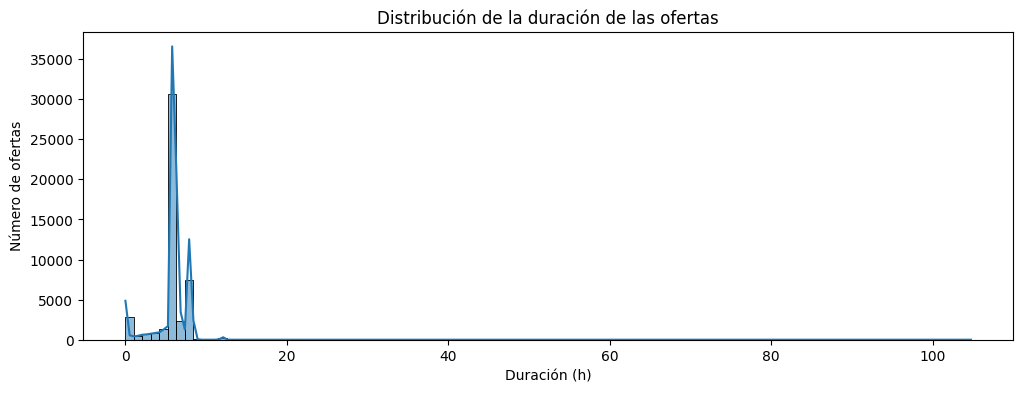

In [166]:
#Distribución de la duración de las ofertas

plt.figure(figsize=(12, 4)) # Crea una nueva figura de 8 pulgadas de ancho por 4 de alto.

# Uso de Seaborn para graficar un histograma de la columna duracion_horas.
# El parámetro kde añade una curva de densidad que tiene como finalidad visualizar la forma de la distribución.
sns.histplot(ofertas['duracion_horas'], bins = 100, kde = True)

plt.title('Distribución de la duración de las ofertas') # Título del gráfico

plt.xlabel('Duración (h)') # Nombre del eje x
plt.ylabel('Número de ofertas') # Nombre del eje y
plt.show 

**Observaciones:**

- La duración promedio de las ofertas es de 5,86 horas. Se identifican valores atípicos con duraciones de hasta 104,75 horas (aproximadamente 4,36 días), que podrían corresponder a ofertas de larga duración, como campañas por el Día del Padre o aniversarios de la marca.
- La distribución es altamente sesgada a la derecha, lo que indica que la mayoría de las ofertas tienen duraciones cortas, pero existen casos aislados con duraciones considerablemente largas.
- La mediana es muy cercana a la media, lo que sugiere que, aunque los valores atípicos influyen en la media, su efecto se ve compensado por la presencia de valores atípicos muy bajos (ofertas con una duración cercana a 0 horas).
- Se observa una alta concentración de ofertas con duración cercana a 0 horas, posiblemente correspondientes a ofertas relámpago.
- El rango intercuartílico se encuentra entre 6 h (Q1) y 6,01 h (Q3), lo que indica que el 50 % central de las ofertas tiene una duración aproximada de 6 horas.
- La desviación estándar es de 1,91 h, pero dada la concentración en 6 h, este valor se explica principalmente por los datos extremos.

#### 3.1.2. ¿En qué periodos se concentra la mayor cantidad de ofertas?

In [175]:
#Creación de columna que contiene los datos de mes
ofertas['mes'] = ofertas['fecha'].dt.to_period('M')
#Conteo por mes
ofertas_por_mes = ofertas.groupby('mes').agg({'mes':'size'})
ofertas_por_mes.columns = ['numero_de_ofertas']
ofertas_por_mes = ofertas_por_mes.reset_index()
ofertas_por_mes

,mes,numero_de_ofertas
0,2021-06,17592
1,2021-07,29252


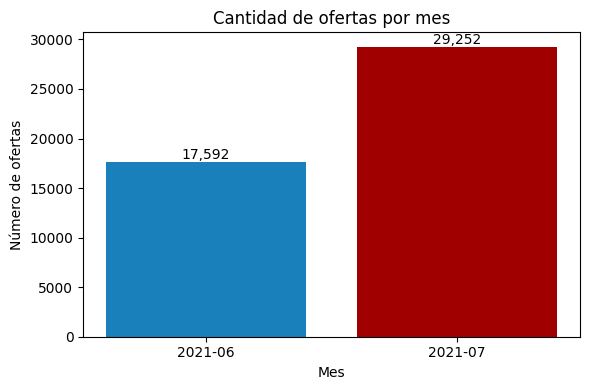

In [186]:
# Datos
meses = ofertas_por_mes['mes'].astype(str)
num_ofertas = ofertas_por_mes['numero_de_ofertas']

# Distribución de la duración de las ofertas
plt.figure(figsize=(6, 4))
bars = plt.bar(meses, num_ofertas, color=['#1a80bb', '#a00000'])

# Etiquetas y título
plt.xlabel('Mes')
plt.ylabel('Número de ofertas')
plt.title('Cantidad de ofertas por mes')

# Mostrar los valores encima de cada barra
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2,
             bar.get_height(),
             f'{bar.get_height():,}',
             ha='center', va='bottom')
plt.tight_layout()
plt.show()

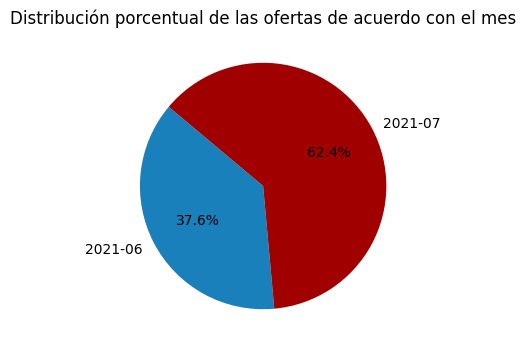

In [190]:
plt.figure(figsize = (4, 4))
custom_palette = ['#1a80bb', '#a00000']
plt.pie(ofertas_por_mes['numero_de_ofertas'], labels = ofertas_por_mes['mes'], autopct='%1.1f%%', startangle=140, colors = custom_palette)
plt.title('Distribución porcentual de las ofertas de acuerdo con el mes')
plt.show()

In [193]:
print(29252-17592)
print(62.4 - 37.6)

11660
24.799999999999997


**Observaciones:**

Se evidencia un aumento de 24,6 puntos porcentuales en el número de ofertas durante el mes de julio en comparación con junio, lo que representa 11 660 ofertas adicionales. Esto indica un impulso significativo en las promociones durante el segundo mes analizado, posiblemente asociado a liquidaciones de mitad de año o campañas estacionales.

En el caso de campañas estacionales, se realizará una validación por tipo de artículos para determinar si el incremento está relacionado con una temática específica.

In [203]:
#Conteo por mes
ofertas_por_mes_y_departamento = pd.pivot_table(ofertas, index = 'departamento',
                                               columns = 'mes',
                                               values = 'tipo',
                                               aggfunc = 'count',
                                               fill_value = 0
                                               )

ofertas_por_mes_y_departamento

mes,2021-06,2021-07
departamento,,
acc tools,16,75
agro,1,0
antiques & hobbies,4,0
apparel,1426,2330
apparel accesories,1490,2746
autoparts,590,1060
baby,244,500
batteries,18,72
beauty equipment,355,703


In [210]:
mes_y_departamento_graph = ofertas_por_mes_y_departamento.reset_index()
mes_y_departamento_graph.columns = ['departamento', 'ofertas_en_junio', 'ofertas_en_julio']
mes_y_departamento_graph['variacion_neta'] = mes_y_departamento_graph['ofertas_en_julio'] - mes_y_departamento_graph['ofertas_en_junio']
mes_y_departamento_graph['variacion_porcentual'] = (((mes_y_departamento_graph['ofertas_en_julio'] - mes_y_departamento_graph['ofertas_en_junio'])/mes_y_departamento_graph['ofertas_en_junio'])*100).round(2)
mes_y_departamento_graph

,departamento,ofertas_en_junio,ofertas_en_julio,variacion_neta,variacion_porcentual
0,acc tools,16,75,59,368.75
1,agro,1,0,-1,-100.00
2,antiques & hobbies,4,0,-4,-100.00
3,apparel,1426,2330,904,63.39
4,apparel accesories,1490,2746,1256,84.30
5,autoparts,590,1060,470,79.66
6,baby,244,500,256,104.92
7,batteries,18,72,54,300.00
8,beauty equipment,355,703,348,98.03
9,"books, multimedia & other e!",262,216,-46,-17.56


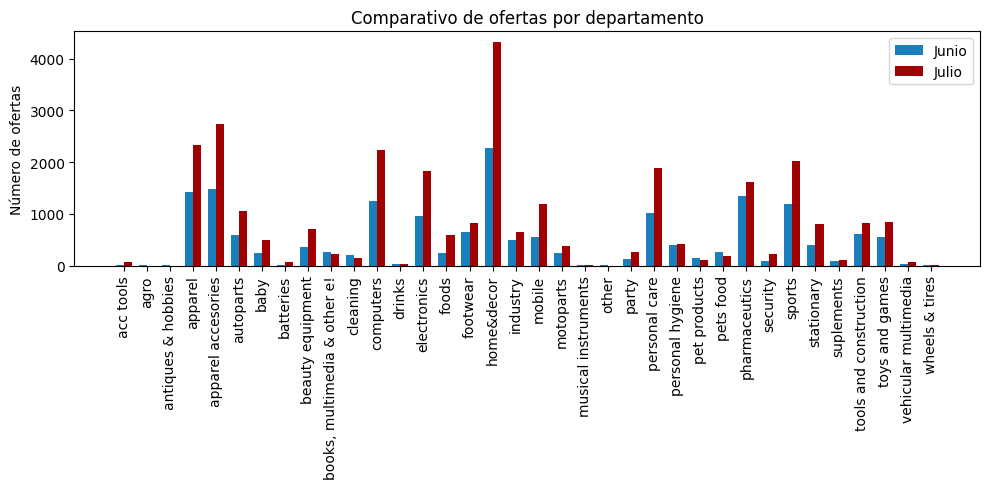

In [212]:
#posiciones para barras
x = np.arange(len(mes_y_departamento_graph['departamento']))
width = 0.35

plt.figure(figsize=(10, 5))
plt.bar(x - width/2, mes_y_departamento_graph['ofertas_en_junio'], width, label='Junio', color='#1a80bb')
plt.bar(x + width/2, mes_y_departamento_graph['ofertas_en_julio'], width, label='Julio', color='#a00000')

plt.xticks(x, mes_y_departamento_graph['departamento'], rotation=90)
plt.ylabel("Número de ofertas")
plt.title("Comparativo de ofertas por departamento")
plt.legend()
plt.tight_layout()
plt.show()

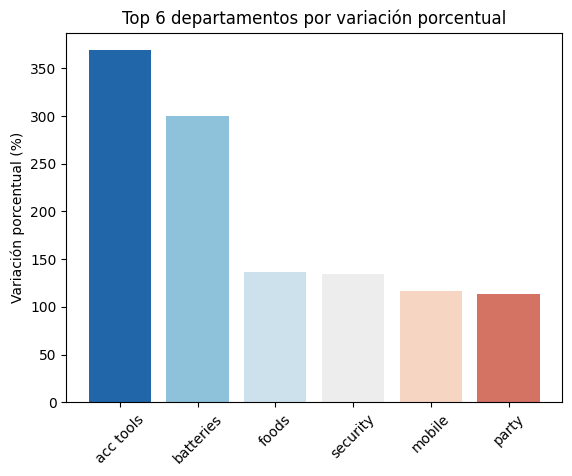

In [225]:
top6 = mes_y_departamento_graph.sort_values('variacion_porcentual', ascending=False).head(6)
custom_palette = ['#2066a8', '#8ec1da', '#cde1ec', '#ededed', '#f6d6c2', '#d47264']

plt.bar(top6['departamento'], top6['variacion_porcentual'], color=custom_palette)
plt.xticks(rotation=45)
plt.ylabel("Variación porcentual (%)")
plt.title("Top 6 departamentos por variación porcentual")
plt.show()

**Observaciones:**

- Los seis departamentos con mayor variación porcentual en la cantidad de promociones registran incrementos de entre 100 % y 350 %, lo que implica que en julio tuvieron entre el doble y hasta cinco veces más ofertas que en junio.

- Los dos departamentos con las variaciones más altas son tools y batteries, ambos con incrementos porcentuales superiores al 300 %. Esto sugiere que el aumento en la cantidad de ofertas respecto a junio podría estar relacionado con una mayor demanda motivada por estacionalidades o temporadas específicas.

- Considerando que uno de estos departamentos corresponde a baterías, es posible que en este periodo se incremente la venta de artículos asociados a tecnología o a la reposición de insumos.

## Conclusiones

1. **Incremento general de promociones**

En julio se registró un aumento del **24,6 %** en el número total de ofertas respecto a junio, equivalente a **11.660 promociones adicionales**. Este comportamiento podría estar asociado a campañas de liquidación de mitad de año o eventos estacionales.


3. **Departamentos con mayor variación**

Los seis departamentos con mayor variación porcentual presentaron incrementos entre **100 % y 350 %**, destacando:
- **Tools** y **Batteries**, con aumentos superiores al 300 %.  
- Esto podría indicar un impulso estacional, como campañas orientadas a productos tecnológicos, insumos de reposición o herramientas.


3. **Duración de las ofertas**  

- La duración promedio fue de **5,86 horas**.  
- Se detectaron valores atípicos con duraciones de hasta **104,75 horas** (aproximadamente 4,36 días), probablemente vinculados a campañas prolongadas como Día del Padre o aniversarios de marca.
- La distribución es **altamente sesgada a la derecha**, con predominio de ofertas cortas pero algunos casos de gran duración.
- Existe una **alta concentración** de ofertas con duración cercana a **0 horas**, probablemente ofertas relámpago.


4. **Patrones en la duración**  

- El rango intercuartílico va de **6 h (Q1)** a **6,01 h (Q3)**, lo que significa que el 50 % central de las ofertas dura aproximadamente lo mismo.
- La desviación estándar (1,91 h) está influida por valores extremos, pero su impacto se ve compensado por ofertas muy cortas.

## Recomendaciones

1. **Validar relación con campañas estacionales**

Investigar si el incremento en departamentos como **Tools** y **Batteries** coincide con promociones por fechas especiales o lanzamientos, para anticipar su repetición en el futuro.

3. **Optimizar duración de ofertas**  

Analizar el rendimiento de las promociones cortas versus largas para identificar la duración óptima según el tipo de producto o temporada.

4. **Segmentar por tipo de producto**  

Clasificar las ofertas de los departamentos con mayor crecimiento para identificar cuáles productos impulsan los picos de promociones.

5. **Monitoreo continuo**  

Implementar un seguimiento mensual que permita detectar cambios abruptos en departamentos clave y actuar de forma proactiva en campañas futuras.

6. **Gestión de valores atípicos**  

Evaluar el desempeño de las ofertas extremadamente largas o cortas para determinar si generan un impacto real en ventas o si solo distorsionan las métricas.